<a href="https://colab.research.google.com/github/Harithelamin/Computational_Intelligence/blob/main/AgeGenderDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FYS-STK4155 - Project 3: Classifying age, and gender using Ridge, Lasso, Bagging, AdaBoost, and Convencual Neural Network



1. Import All library


In [214]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, random, io,  tensorflow as tf, tensorflow as keras


In [215]:
! pip install tensorflow

In [216]:
! pip install keras

In [217]:
#!pip  install tensorflow
#!pip  install tensorflow.keras

from tensorflow import keras
from keras import layers


2. Loading datasets age, and gender(FACE DATA) .CSV


database link: https://www.kaggle.com/datasets/nipunarora8/age-gender-and-ethnicity-face-data-csv?resource=download

In [218]:
#Get Data from Google Drive
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['age_gender.csv']))
df.head()
print(df)

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
#Get Data from local drive
import pandas as pd
from pathlib import Path
data = Path("C:/users/harit/Documents/age_gender.csv")
df = pd.read_csv(data.resolve(), sep=',')
df.head(3)


,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...


In [ ]:
df.nunique()

age            104
ethnicity        5
gender           2
img_name     23479
pixels       23315
dtype: int64

In [ ]:
#df.nunique()
#df.shape
df.nunique()


age            104
ethnicity        5
gender           2
img_name     23479
pixels       23315
dtype: int64

In [ ]:
df.head(10)

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
5,1,2,0,20161220144957407.jpg.chip.jpg,195 198 200 200 198 198 199 199 198 197 197 19...
6,1,2,0,20161220145040127.jpg.chip.jpg,208 216 217 219 222 223 222 221 220 220 221 22...
7,1,2,0,20170109191125532.jpg.chip.jpg,99 142 169 177 179 181 183 186 187 186 191 190...
8,1,2,0,20161219222749039.jpg.chip.jpg,127 127 133 140 143 148 152 157 160 165 172 17...
9,1,2,0,20170109191209991.jpg.chip.jpg,199 211 211 214 216 216 219 221 222 224 219 21...


In [ ]:
df.info

<bound method DataFrame.info of        age  ethnicity  gender                        img_name  \
0        1          2       0  20161219203650636.jpg.chip.jpg   
1        1          2       0  20161219222752047.jpg.chip.jpg   
2        1          2       0  20161219222832191.jpg.chip.jpg   
3        1          2       0  20161220144911423.jpg.chip.jpg   
4        1          2       0  20161220144914327.jpg.chip.jpg   
...    ...        ...     ...                             ...   
23700   99          0       1  20170120221920654.jpg.chip.jpg   
23701   99          1       1  20170120134639935.jpg.chip.jpg   
23702   99          2       1  20170110182418864.jpg.chip.jpg   
23703   99          2       1  20170117195405372.jpg.chip.jpg   
23704   99          0       1  20170110182052119.jpg.chip.jpg   

                                                  pixels  
0      129 128 128 126 127 130 133 135 139 142 145 14...  
1      164 74 111 168 169 171 175 182 184 188 193 199...  
2      67 

In [ ]:
df.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


I will foucus on age column

In [11]:
#Columns Headers
df.columns

Index(['age', 'ethnicity', 'gender', 'img_name', 'pixels'], dtype='object')

# Add Network Network layers

In [12]:
model = keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# Add a LSTM layer with 128 internal units.
model.add(layers.LSTM(128))

# Add a Dense layer with 10 units.
model.add(layers.Dense(10))



In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


In [23]:
#Add train model
from sklearn.model_selection import train_test_split
Col = ['gender','age']

y=df[Col]
X=df.drop(Col,axis=1)

X= pd.Series(X['pixels'])


X = X.apply(lambda x: x.split(' '))
X = X.apply(lambda x: np.array(list(map(lambda z: int(z), x))))
X = np.array(X)
X = np.stack(np.array(X), axis=0)
X = np.reshape(X, (-6, 48, 48))

X.shape

(23705, 48, 48)

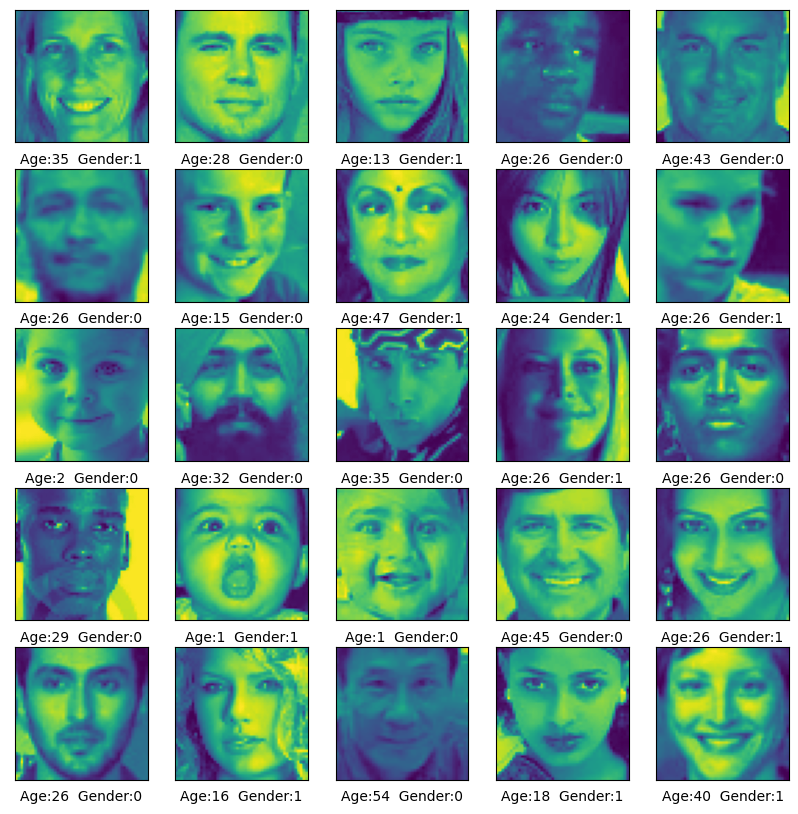

In [38]:
#Plot data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

for i,a in zip(np.random.randint(0, 20000, 58),range(1,26)):
    plt.subplot(5,5,a)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
    plt.xlabel(
        "Age:"+str(y['age'].iloc[i])+       
        "  Gender:"+ str(y['gender'].iloc[i])
    )
plt.show()

In [25]:
y_age=np.array(y['age'])
y_gender=np.array(y['gender'])

In [26]:
#Split Gender X, and Y train, and test 
X_gender_train, X_gender_test, y_gender_train, y_gender_test = train_test_split(X, y_gender, train_size=0.9)
    

#Add train model

In [239]:
##Split Age X, and Y train, and test 
X_age_train, X_age_test, y_age_train, y_age_test = train_test_split(X, y_age, train_size=0.9)


#using Optimizer
#https://faroit.com/keras-docs/0.2.0/optimizers/

#Build Model

In [243]:
#Building Model using Adam Opptimizer

#Set Input Shape H, and L
Nomb_pix=2304
H=48
L=48

def RMSprop():
    return keras.optimizers.RMSprop(learning_rate = 0.001, rho = 0.9)


import tensorflow as tf
def build_model_with_Aadm_optimizer(num_classes, activation='adam', loss='sparse_categorical_crossentropy'):
    
    inputs = tf.keras.Input(shape=(H, L, 1))
    x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
    x = tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    outputs = tf.keras.layers.Dense(num_classes, activation=activation)(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    #
    # add metrics
    metrics = [
        tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
    ] 
    #Adam Optimizer
    optimizer = keras.optimizers.Adam(learning_rate=3e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    #model.compile(loss='categorical_crossentropy', metrics=['accuracy'] ,optimizer=optimizer)

    model.compile(optimizer='RMSprop', loss=loss, metrics = ['accuracy'])
    #model.compile(loss = 'mean_squared_error',     optimizer = 'sgd', metrics = [metrics.categorical_accuracy])

    #model.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(), metrics = ['accuracy'])
    return model

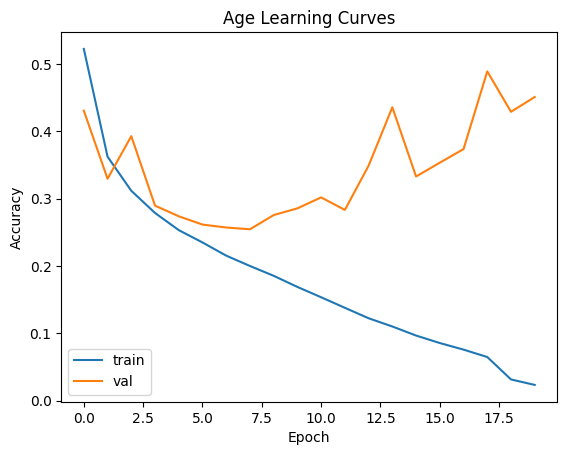

In [256]:
#Age model History
age_model = build_model_with_Aadm_optimizer(1, activation='sigmoid', loss='binary_crossentropy')

age_history= age_model.fit(
    X_age_train,
    y_age_train,
    validation_split=0.2,
    batch_size=64,
    epochs=20,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

#Age Learning carve
plt.title('Age Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(age_history.history['loss'], label='train')
plt.plot(age_history.history['val_loss'], label='val')
plt.legend()
plt.show()


#Model Evaluate
#Age_history.evaluate(X_gender_test,y_gender_test)

#Evaluate Age Model

In [47]:
print("Evaluate age Model....")
age_model.evaluate(X_age_test, y_age_test)


Evaluate gender Model....
75/75 [==============================] - 1s 14ms/step - loss: 0.2804 - accuracy: 0.8857


[0.2804493010044098, 0.8857022523880005]

In [48]:
test_loss, test_acc = gender_model.evaluate(X_gender_test, y_gender_test)
print(test_acc)

75/75 [==============================] - 1s 13ms/step - loss: 0.2804 - accuracy: 0.8857
0.8857022523880005


CNN has achieved a test accuracy of more than 88%. It's very good

#Bagging
https://www.w3schools.com/python/python_ml_bagging.asp

In [64]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [110]:
X_gender_train.shape

(21334, 48, 48)

In [70]:
X_gender_test.shape

(2371, 48, 48)

In [114]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

np.random.seed(45)
clf = DecisionTreeClassifier(criterion="entropy")

In [182]:
print(df['age'].value_counts())

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
111       1
103       1
Name: age, Length: 104, dtype: int64


In [167]:
X = df[Col] # Input Variable 
y = df['age'] # Target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 3065, random_state = 2)

In [168]:
clf.fit(X_train, y_train)
from sklearn.tree import DecisionTreeClassifier 
np.random.seed(45)
clf = DecisionTreeClassifier(criterion="entropy") 
clf = clf.fit(X_train, y_train)

In [169]:
y_pred = clf.predict(X_test)


In [170]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))


Accuracy: 0.9984011627906977


In [171]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(clf)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9987887596899225

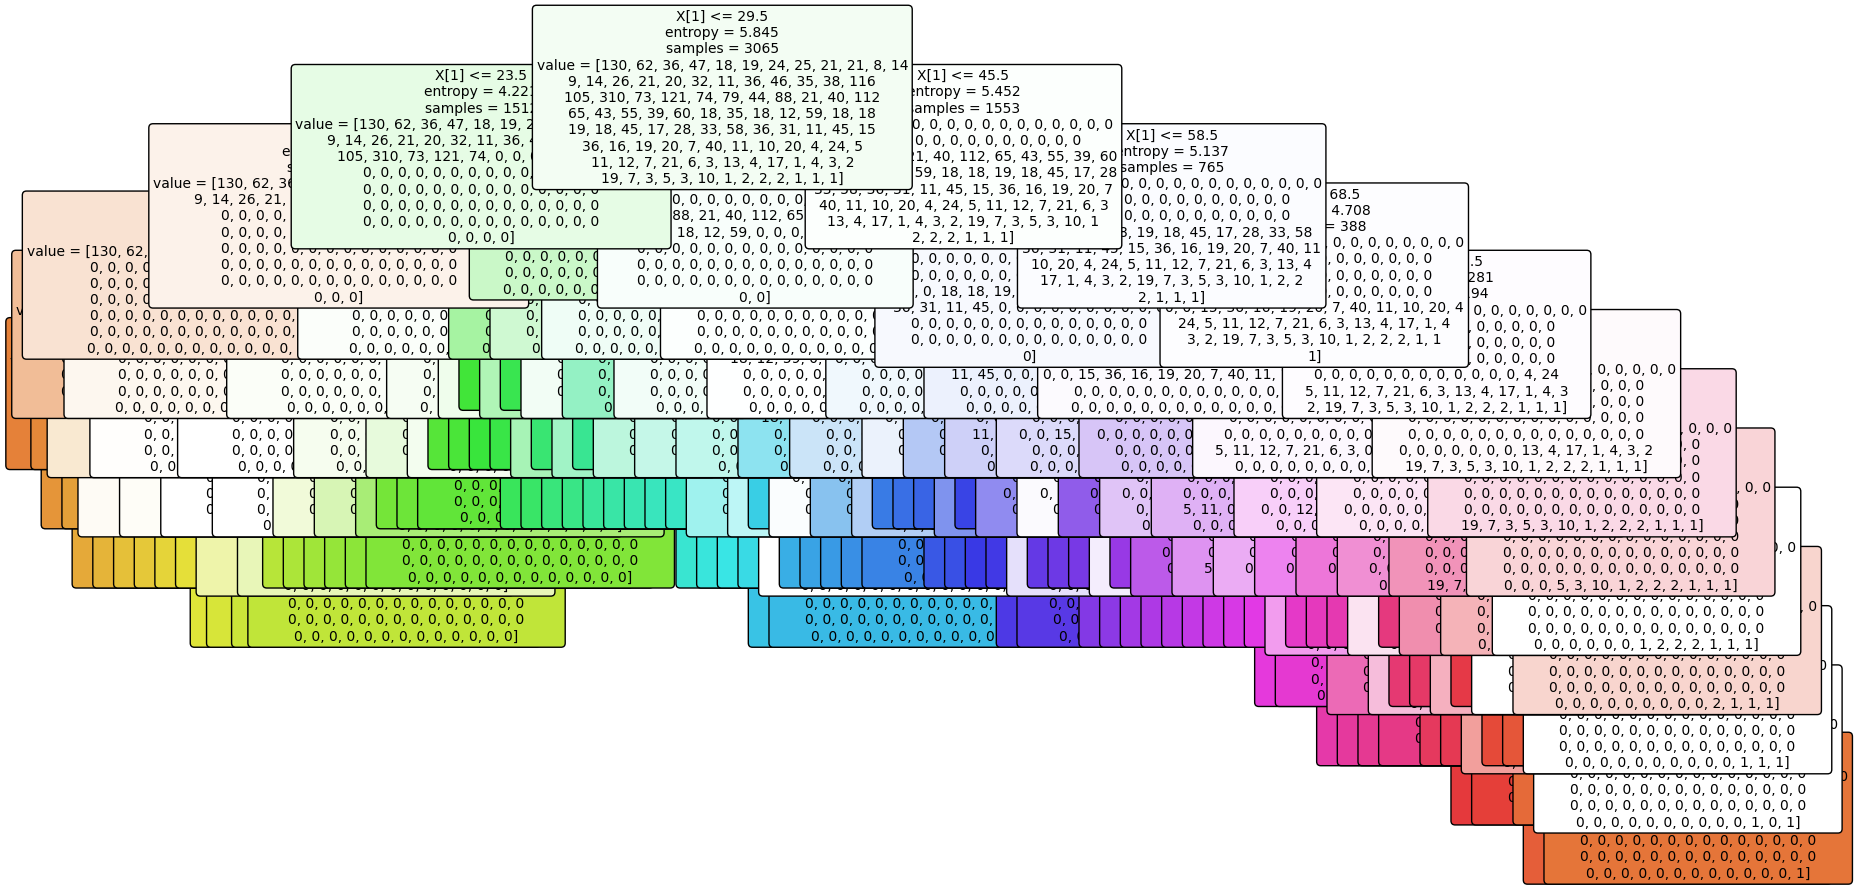

In [172]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(clf, fontsize=10, filled=True, rounded=True)
plt.show()

Ridge, and lasso    

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler

In [174]:
print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The dimension of X_train is (3065, 2)
The dimension of X_test is (20640, 2)


In [175]:
#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

#predict
prediction = lr.predict(X_test)

#actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))


#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))

The train score for lr model is 1.0
The test score for lr model is 1.0

Ridge Model............................................

The train score for ridge model is 0.9999892952240582
The test score for ridge model is 0.999989320416984


In [177]:
#lasso
#Lasso regression model
print("\nLasso Model")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("The train score for lasso model is {}".format(train_score_ls))
print("The test score for lasso model is {}".format(test_score_ls))


Lasso Model
The train score for ls model is 0.7500455811325051
The test score for ls model is 0.7495866282535544


#Adapost

In [178]:
# Create adaboost classifer object
from sklearn.ensemble import AdaBoostClassifier

# Import Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics 
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
object =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = object.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.09142441860465116


In [179]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.09142441860465116


In [ ]:
def mean_squared_error(y_true, y_predicted):
	
	# Calculating the loss or cost
	cost = np.sum((y_true-y_predicted)**2) / len(y_true)
	return cost

In [213]:
# Mean Squared Error

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score


pipeline = make_pipeline(StandardScaler(), LinearRegression())
pipeline.fit(X_train, y_train)
# Calculate the predicted values

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)


# Mean Squared Error
print('MSE train =',  (mean_squared_error(y_train, y_train_pred)))
print('MSE test = ',(mean_squared_error(y_test, y_test_pred)))
            

MSE train = 1.9154623762714594e-28
MSE test =  1.8864416084201441e-28


In [211]:
print('R2 Error for train data =',(r2_score(y_train, y_train_pred)))
print('R2 Error for test data =',(r2_score(y_test, y_test_pred)))


               

R2 Error for train data = 1.0
R2 Error for test data = 1.0
